In [1]:
#臉部辨識
from sklearn import datasets
data=datasets.fetch_olivetti_faces() #人臉資料庫
print(data.DESCR)
print(data.target)
print(data.data)


Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7


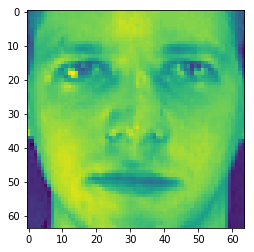

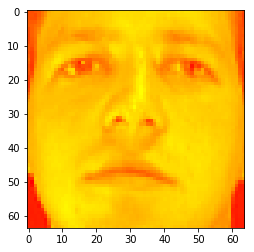

In [3]:
#顯示臉部image
from sklearn import datasets
import matplotlib.pyplot as plt
data=datasets.fetch_olivetti_faces()
plt.imshow(data.images[0],interpolation='nearest')
plt.show()
plt.imshow(data.images[6],cmap='autumn',interpolation='nearest') #cmap顏色 :https://www.cnblogs.com/denny402/p/5122594.html
plt.show()

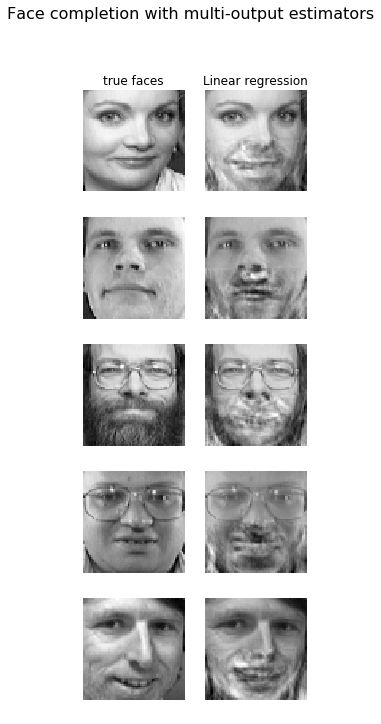

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
data=datasets.fetch_olivetti_faces()
#print(data.DESCR)
#print(data.target)
#print(data.data)
#plt.imshow(data.images[0],cmap='gray',interpolation='nearest')
#plt.show()
#把影像變成一列
targets=data.target
data=data.images.reshape(len(data.images),-1)
#訓練資料30張臉(300張圖片)，測試資料10張臉(100張圖片)
train=data[targets<30]
test=data[targets>=30]
# 從100張測試影像中,亂數選5張出來，變數test的大小變成(5,4096)
n_faces = 5
from sklearn.utils import check_random_state
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]
#把每張訓練影像和測試影像都切割成上下兩部分: X人臉上半部分
#， Y人臉下半部分。
n_pixels = data.shape[1]
X_train = train[:, :(n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]
#決定預測的演算法
from sklearn.linear_model import LinearRegression
ESTIMATORS = {
    "Linear regression": LinearRegression(),
}
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train) #模型訓練
    y_test_predict[name] = estimator.predict(X_test) 
    #模型預測
# Plot the completed faces
image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
plt.show()